In [142]:
import pandas  as pd #Data manipulation
import numpy as np #Data manipulation
import matplotlib.pyplot as plt # Visualization
from scipy.stats import boxcox
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns #Visualization
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'
plt.style.use('seaborn-whitegrid')

In [143]:
# Import dataset
#path ='dataset/'
path = '/content/insurance.csv'
df = pd.read_csv(path)
print('\nNumber of rows and columns in the data set: ',df.shape)


Number of rows and columns in the data set:  (1338, 7)


In [144]:
# desribe the dataset (Exploratory data analysis) 
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [146]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [147]:
df.age.unique()

array([19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 23, 56, 27, 52, 30, 34,
       59, 63, 55, 22, 26, 35, 24, 41, 38, 36, 21, 48, 40, 58, 53, 43, 64,
       20, 61, 44, 57, 29, 45, 54, 49, 47, 51, 42, 50, 39])

In [148]:
#Check for missing value
print(df.isnull())

# print(pd.isnull(df['fueltype']))

        age    sex    bmi  children  smoker  region  charges
0     False  False  False     False   False   False    False
1     False  False  False     False   False   False    False
2     False  False  False     False   False   False    False
3     False  False  False     False   False   False    False
4     False  False  False     False   False   False    False
...     ...    ...    ...       ...     ...     ...      ...
1333  False  False  False     False   False   False    False
1334  False  False  False     False   False   False    False
1335  False  False  False     False   False   False    False
1336  False  False  False     False   False   False    False
1337  False  False  False     False   False   False    False

[1338 rows x 7 columns]


In [149]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [150]:
df.loc[:, df.isnull().any()].columns

Index([], dtype='object')

In [151]:
# correlation plot
corr_p = df.corr(method ='pearson')

In [152]:
corr_p

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


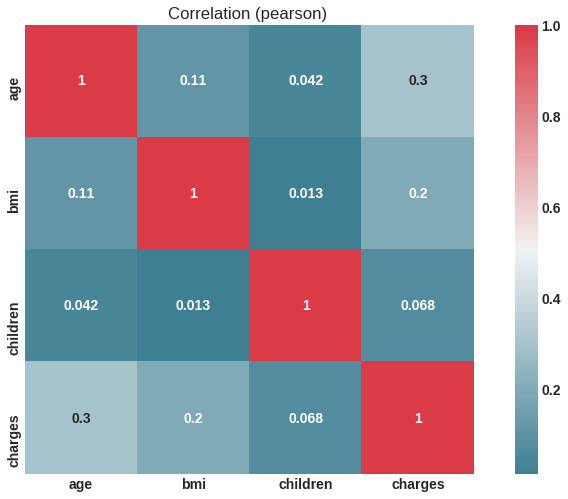

In [153]:
fig, ax = plt.subplots(figsize=(14.7, 8.27))
ax = sns.heatmap(corr_p, mask=np.zeros_like(corr_p, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),square=True, ax=ax, annot=True)
ax.set_title("Correlation (pearson) ")
plt.show()

In [154]:
corr_k = df.corr(method ='kendall')

In [155]:
corr_k

,age,bmi,children,charges
age,1.000000,0.073273,0.043253,0.475302
bmi,0.073273,1.000000,0.011562,0.082524
children,0.043253,0.011562,1.000000,0.103107
charges,0.475302,0.082524,0.103107,1.000000


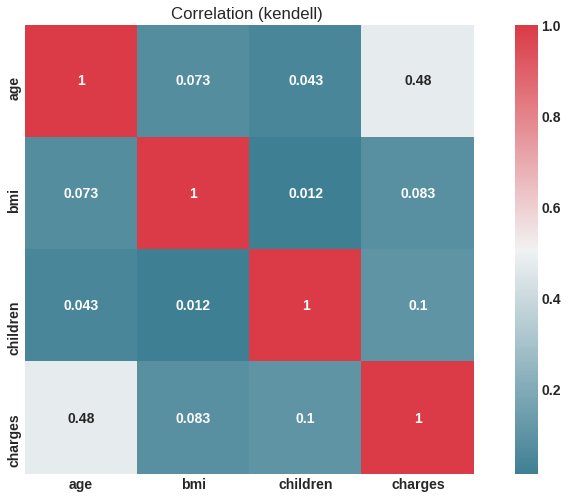

In [156]:
fig, ax = plt.subplots(figsize=(14.7, 8.27))
ax = sns.heatmap(corr_k, mask=np.zeros_like(corr_k, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),square=True, ax=ax, annot=True)
ax.set_title("Correlation (kendell) ")
plt.show()

Text(0.5, 1.0, 'Age vs bmi (sex)')

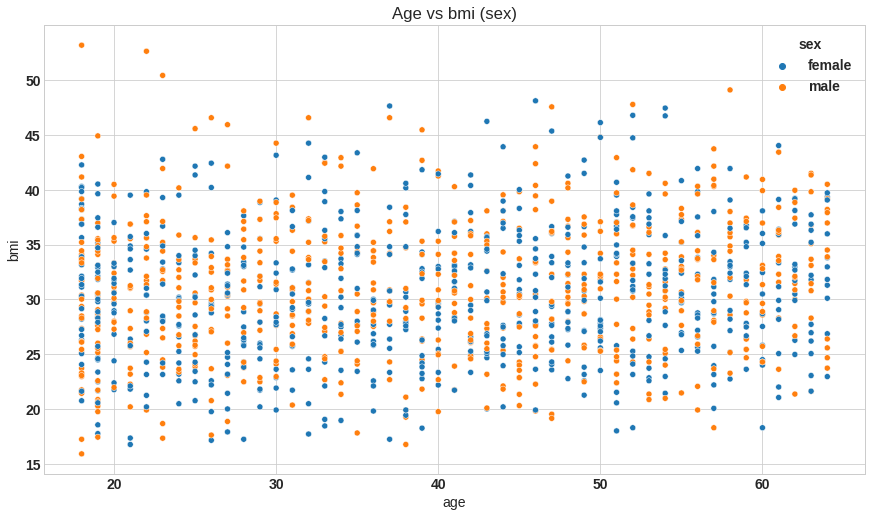

In [157]:
fig, ax = plt.subplots(figsize=(14.7, 8.27))
ax = sns.scatterplot(data=df, x="age", y="bmi", hue="sex")
ax.set_title("Age vs bmi (sex)")

Text(0.5, 1.0, 'Age vs bmi (smoker)')

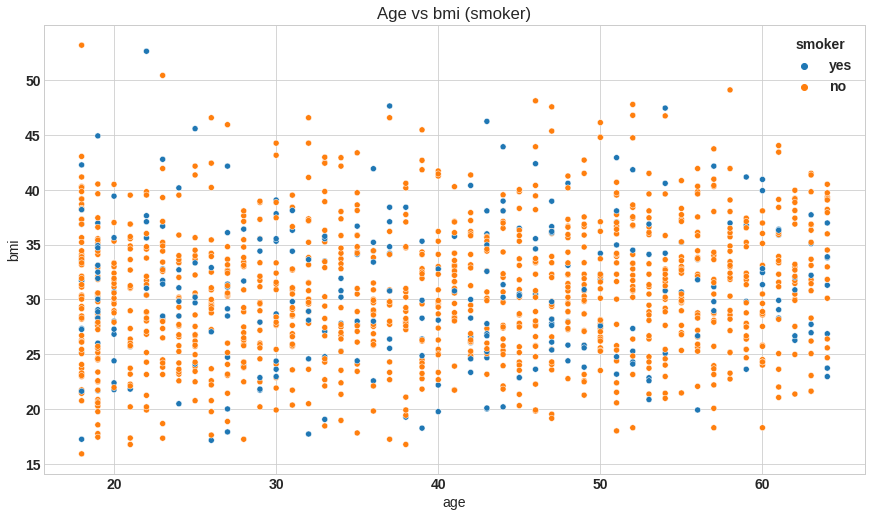

In [158]:
fig, ax = plt.subplots(figsize=(14.7, 8.27))
ax = sns.scatterplot(data=df, x="age", y="bmi", hue="smoker")
ax.set_title("Age vs bmi (smoker)")

Text(0.5, 1.0, 'Smoker vs charges')

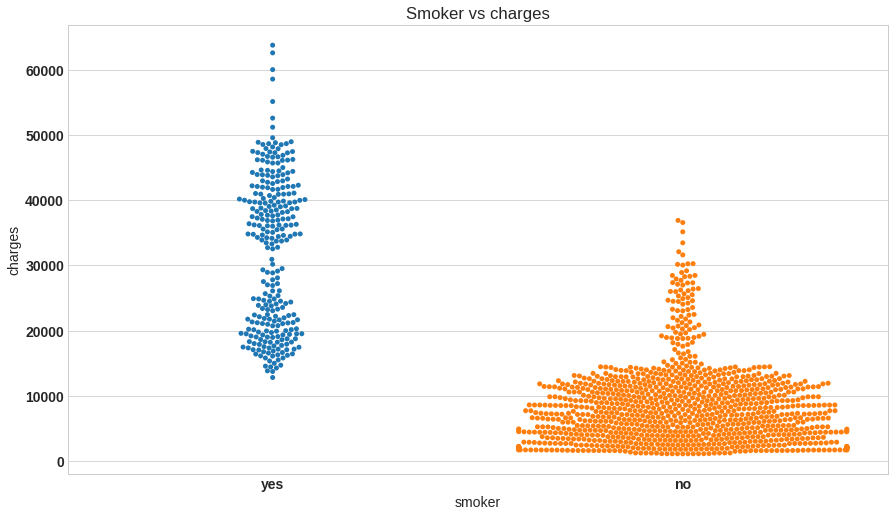

In [159]:
fig, ax = plt.subplots(figsize=(14.7, 8.27))
ax = sns.swarmplot(data=df, x="smoker", y="charges")
ax.set_title("Smoker vs charges")

Text(0.5, 1.0, 'Sex vs charges')

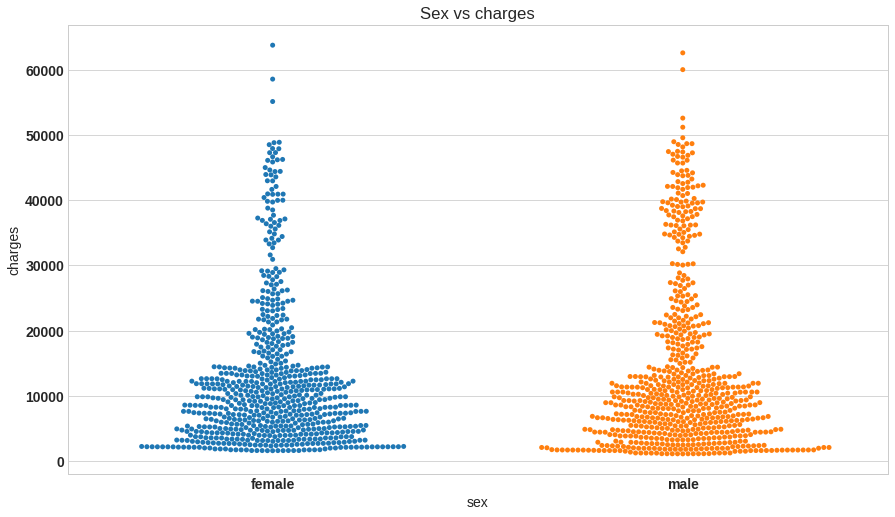

In [160]:
fig, ax = plt.subplots(figsize=(14.7, 8.27))
ax = sns.swarmplot(data=df, x="sex", y="charges")
ax.set_title("Sex vs charges")

Text(0.5, 1.0, 'Age vs bmi (smoker)')

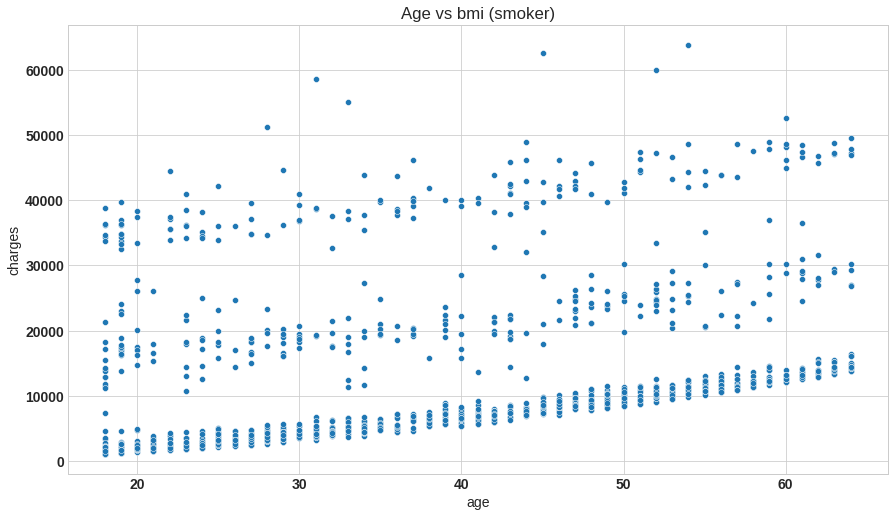

In [161]:
fig, ax = plt.subplots(figsize=(14.7, 8.27))
ax = sns.scatterplot(data=df, x="age", y="charges")
ax.set_title("Age vs bmi (smoker)")

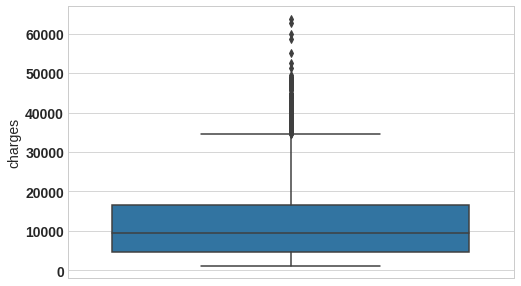

In [162]:
sns.boxplot(y = 'charges', data = df)

In [163]:
from scipy import stats

In [164]:
z = np.abs(stats.zscore(df[['age','children','bmi','charges']]))

In [165]:
threshold = 3
print(np.where(z > threshold))

(array([  32,   34,   71,  116,  166,  413,  425,  438,  543,  568,  577,
        640,  819,  847,  877,  932,  937,  969,  984, 1047, 1085, 1116,
       1130, 1146, 1230, 1245, 1272, 1300, 1317]), array([1, 3, 1, 2, 1, 1, 1, 1, 3, 1, 3, 1, 3, 2, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 3, 3, 1, 1, 3, 2]))


In [166]:
df= df[(z < threshold).all(axis=1)]

In [167]:
df.shape

(1309, 7)

In [168]:
print("Skewness: %f" % df['charges'].skew())
# highly right skewed 

Skewness: 1.437160


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


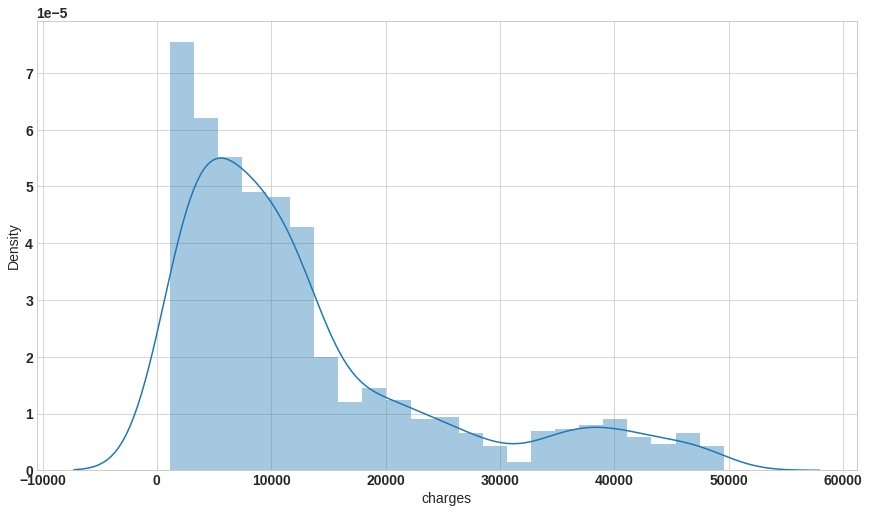

In [169]:
fig, ax = plt.subplots(figsize=(14.7, 8.27))
sns.distplot(df['charges'])

In [170]:
# converting to natural log 
df['log charges'] = np.log(df['charges'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


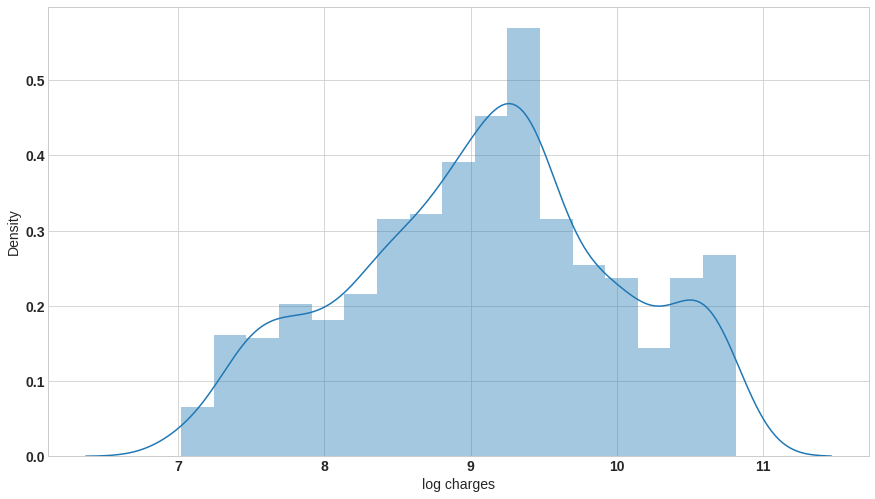

In [171]:
fig, ax = plt.subplots(figsize=(14.7, 8.27))
sns.distplot(df['log charges'])

In [172]:
# using scipy
df['sp charges'] = boxcox(df['charges'], 0)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


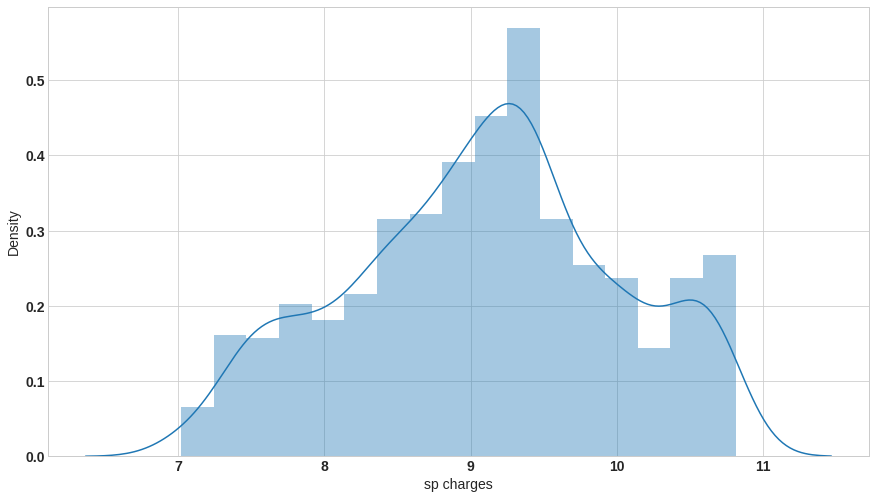

In [173]:
fig, ax = plt.subplots(figsize=(14.7, 8.27))
sns.distplot(df['sp charges'])

In [174]:
df.head()

,age,sex,bmi,children,smoker,region,charges,log charges,sp charges
0,19,female,27.900,0,yes,southwest,16884.92400,9.734176,9.734176
1,18,male,33.770,1,no,southeast,1725.55230,7.453302,7.453302
2,28,male,33.000,3,no,southeast,4449.46200,8.400538,8.400538
3,33,male,22.705,0,no,northwest,21984.47061,9.998092,9.998092
4,32,male,28.880,0,no,northwest,3866.85520,8.260197,8.260197


#Convert categorical data into numbers


*   Label Enocding
*   One hot Encoding


#Lable Encoding
Label encoding refers to transforming the word labels into numerical form so that the algorithms can understand how to operate on them.

#One hot Encoding
A One hot encoding is a representation of categorical variable as binary vectors.It allows the representation of categorical data to be 
more expresive. This first requires that the categorical values be mapped to integer values, that is label encoding. Then, each integer 
value is represented as a binary vector that is all zero values except the index of the integer, which is marked with a 1.

You may take help of pandas get_dummies function for this. 

In [175]:
le = preprocessing.LabelEncoder()

In [176]:
df.head()

,age,sex,bmi,children,smoker,region,charges,log charges,sp charges
0,19,female,27.900,0,yes,southwest,16884.92400,9.734176,9.734176
1,18,male,33.770,1,no,southeast,1725.55230,7.453302,7.453302
2,28,male,33.000,3,no,southeast,4449.46200,8.400538,8.400538
3,33,male,22.705,0,no,northwest,21984.47061,9.998092,9.998092
4,32,male,28.880,0,no,northwest,3866.85520,8.260197,8.260197


In [177]:
df['sex'] = le.fit_transform(df['sex'])
# female =0 male =1
df['smoker']= le.fit_transform(df['smoker'])
# yes = 1 no =0 
df['region']= le.fit_transform(df['region'])


In [178]:
df.head()

,age,sex,bmi,children,smoker,region,charges,log charges,sp charges
0,19,0,27.900,0,1,3,16884.92400,9.734176,9.734176
1,18,1,33.770,1,0,2,1725.55230,7.453302,7.453302
2,28,1,33.000,3,0,2,4449.46200,8.400538,8.400538
3,33,1,22.705,0,0,1,21984.47061,9.998092,9.998092
4,32,1,28.880,0,0,1,3866.85520,8.260197,8.260197


In [179]:
df['region'].value_counts()

2    352
1    322
0    320
3    315
Name: region, dtype: int64

In [180]:
#Train Test split
x = df[['age','sex','bmi','children','smoker','region']]
y = df['log charges']
#test size data set should be 30% data
X_train,X_test,Y_train, Y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [181]:
X_train.shape

(916, 6)

In [182]:
X_test.shape

(393, 6)

#Model building

In [183]:
# Step 1: add x0 =1 to train dataset
X_train_s = X_train.copy()
X_test_s = X_test.copy()
X_train_s['X0'] = 1
X_test_s['X0'] = 1


In [184]:
df.head()

,age,sex,bmi,children,smoker,region,charges,log charges,sp charges
0,19,0,27.900,0,1,3,16884.92400,9.734176,9.734176
1,18,1,33.770,1,0,2,1725.55230,7.453302,7.453302
2,28,1,33.000,3,0,2,4449.46200,8.400538,8.400538
3,33,1,22.705,0,0,1,21984.47061,9.998092,9.998092
4,32,1,28.880,0,0,1,3866.85520,8.260197,8.260197


In [185]:
# Step2: build model
X = X_train_s.to_numpy()
Y = Y_train.to_numpy()
X_trans = X.transpose()
X.shape
X_trans.shape

# The parameters for linear regression model

(7, 916)

In [186]:
a = np.matmul(X_trans, X)


In [187]:
a.shape

(7, 7)

In [188]:
ainv = np.linalg.inv(a)


In [189]:
ainv.shape

(7, 7)

In [190]:
b = np.matmul(ainv , X_trans)


In [191]:
b.shape

(7, 916)

In [192]:
Y.shape

(916,)

In [193]:
theta = np.matmul(b, Y)

In [194]:
theta.shape

(7,)

In [195]:
print(theta)

[ 0.03415366 -0.07787483  0.01175335  0.10252069  1.54601666 -0.04802618
  7.08517019]


In [196]:
# Scikit Learn module
reg = LinearRegression()
reg.fit(X_train, Y_train)
#Parameter
reg.coef_

array([ 0.03415366, -0.07787483,  0.01175335,  0.10252069,  1.54601666,
       -0.04802618])

In [197]:
reg.intercept_

7.085170193937947

#Model evaluation

In [198]:
X_test_s.shape

(393, 7)

In [199]:
print(X_test_s)

      age  sex     bmi  children  smoker  region  X0
1172   56    0  41.910         0       0       2   1
1069   54    0  31.900         1       0       2   1
1001   24    1  32.700         0       1       3   1
821    26    1  17.670         0       0       1   1
1219   38    0  30.210         3       0       1   1
...   ...  ...     ...       ...     ...     ...  ..
330    61    0  36.385         1       1       0   1
935    59    0  27.500         0       0       3   1
540    34    0  38.000         3       0       3   1
1183   48    0  27.360         1       0       0   1
521    32    0  44.220         0       0       2   1

[393 rows x 7 columns]


In [200]:
print(theta)

[ 0.03415366 -0.07787483  0.01175335  0.10252069  1.54601666 -0.04802618
  7.08517019]


In [201]:
# prediction
X_test_s_ar = X_test_s.to_numpy()
Y_test_ar = Y_test.to_numpy()
y_pred = np.matmul(X_test_s_ar, theta)

#Evaluvation: MSE (Write your MSE equation from scratch)


In [202]:
y_pred_sk = reg.predict(X_test)

In [203]:
sum_error = 0
for i in range(len(Y_test_ar)):
		prediction_error = y_pred[i] - Y_test_ar[i]
		sum_error += (prediction_error ** 2)
mean_error = sum_error / float(len(Y_test_ar))
J_mse = mean_error

In [204]:
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse)

The Mean Square Error(MSE) or J(theta) is:  0.17027210742136664


In [205]:
# sklearn regression module

#Evaluvation: MSE
from sklearn.metrics import mean_squared_error
J_mse_sk = mean_squared_error(Y_test, y_pred_sk)

In [206]:
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse_sk)

The Mean Square Error(MSE) or J(theta) is:  0.1702721074213662


In [207]:
intercept= theta[-1]

In [208]:
X_test.head()

,age,sex,bmi,children,smoker,region
1172,56,0,41.91,0,0,2
1069,54,0,31.90,1,0,2
1001,24,1,32.70,0,1,3
821,26,1,17.67,0,0,1
1219,38,0,30.21,3,0,1


In [209]:
features =['age', 'sex','bmi','children','smoker','region']

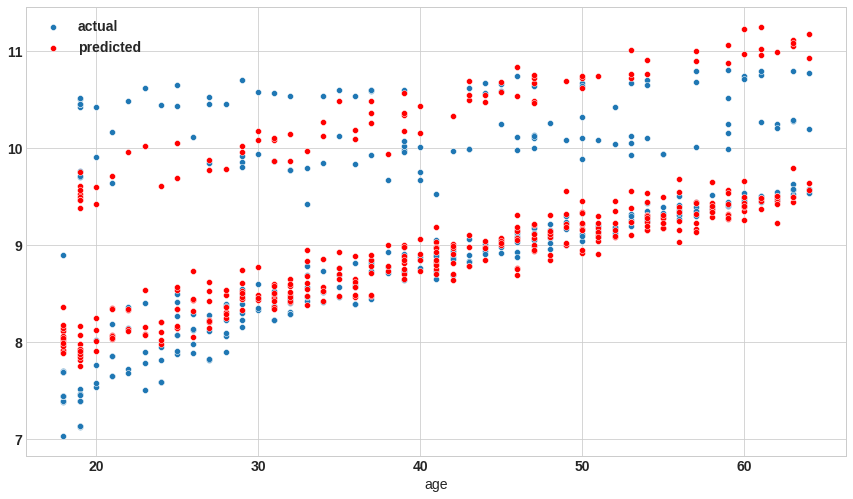

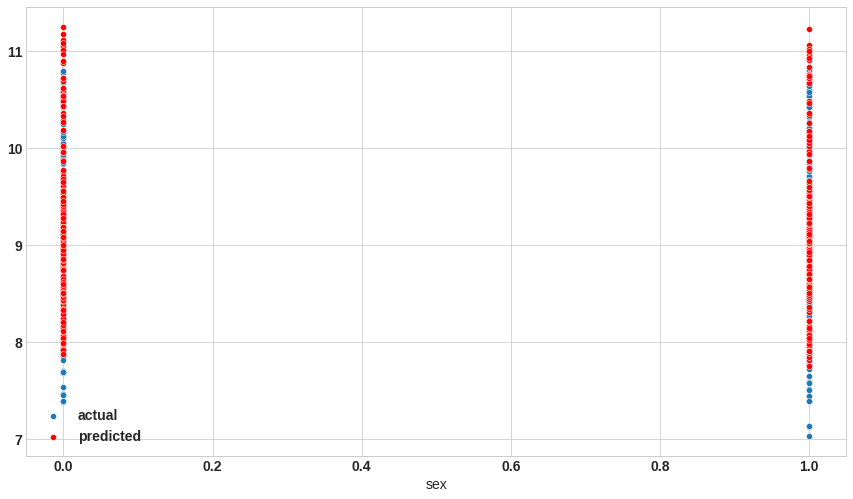

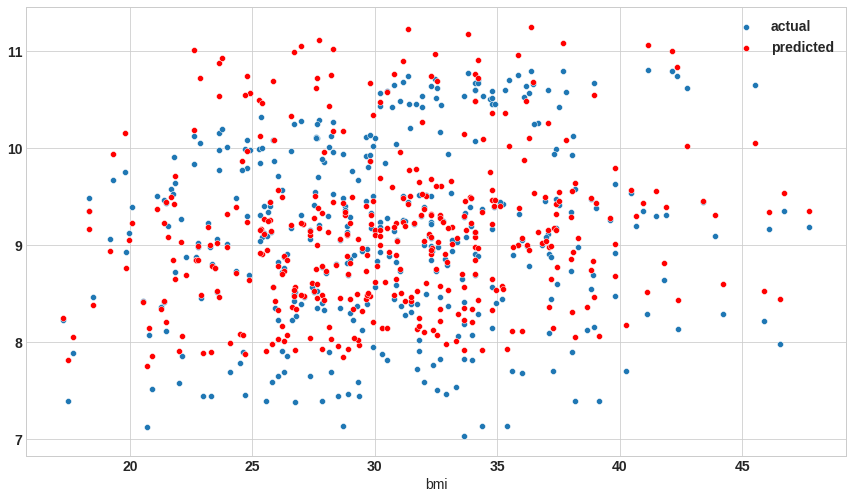

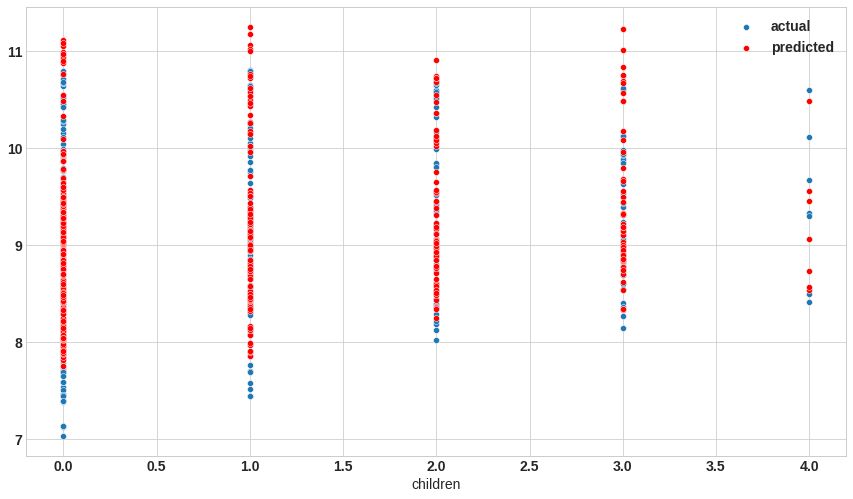

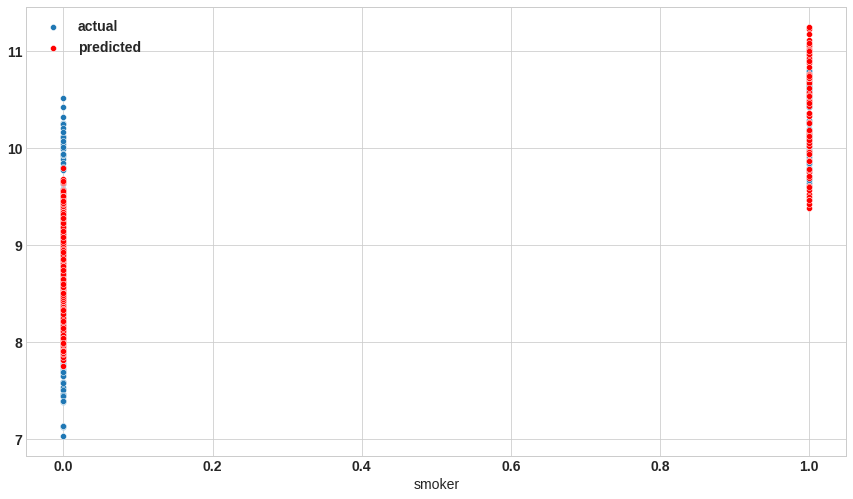

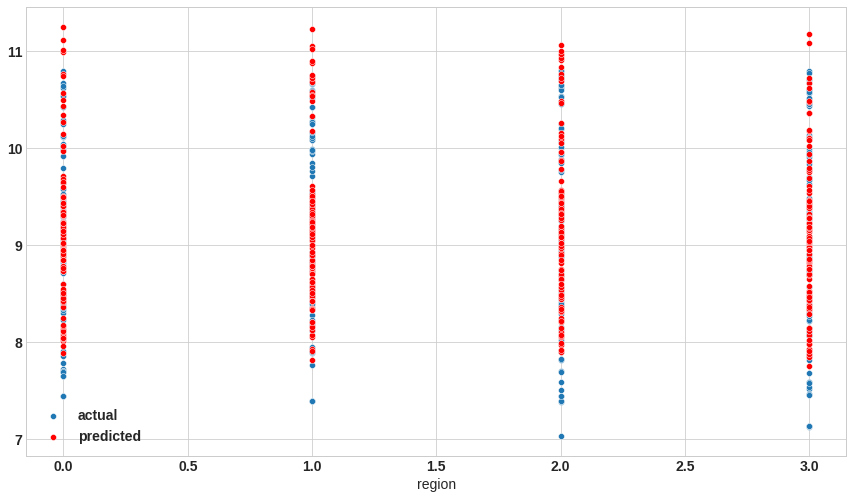

In [212]:
# for model from scratch
i=0
for i in range (0,6):
 fig, ax = plt.subplots(figsize=(14.7, 8.27))
 sns.scatterplot(x= X_test[features[i]], y=Y_test_ar)
 sns.scatterplot(x= X_test[features[i]], y=y_pred, color='r')
 plt.xlabel = features[i]
 plt.legend(['actual','predicted'])

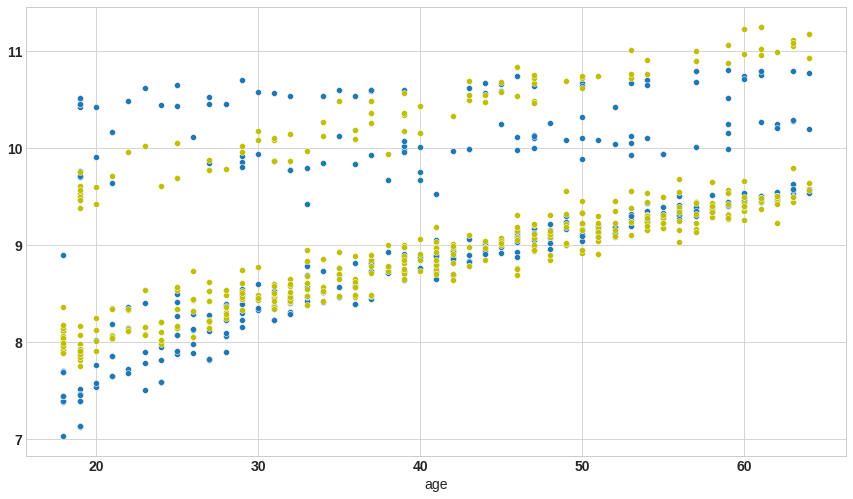

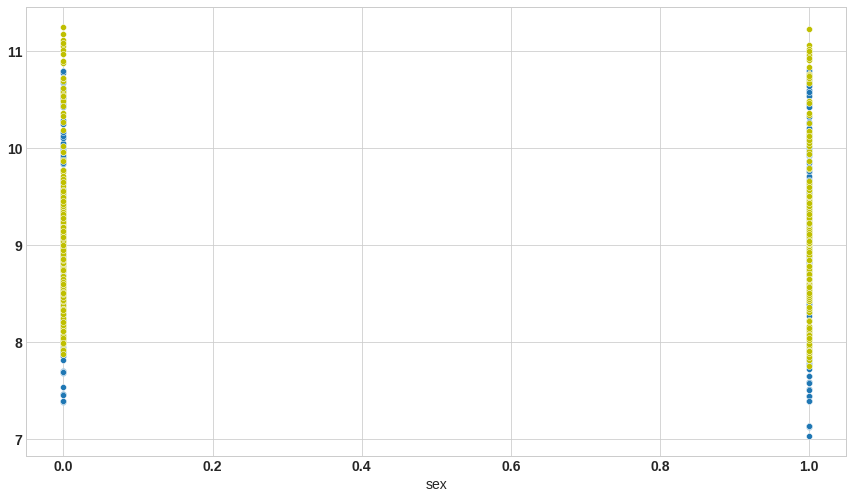

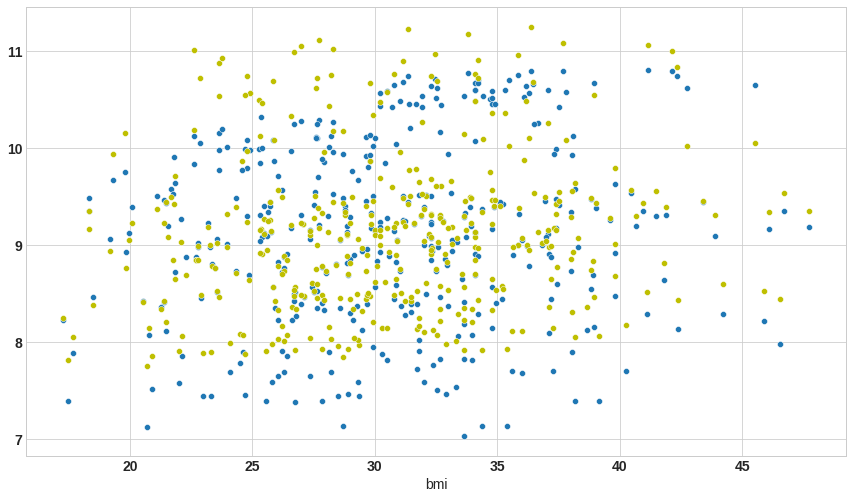

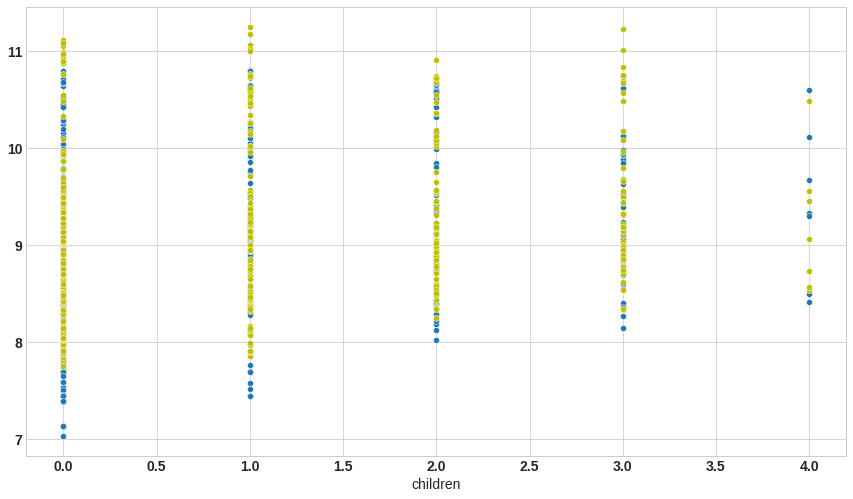

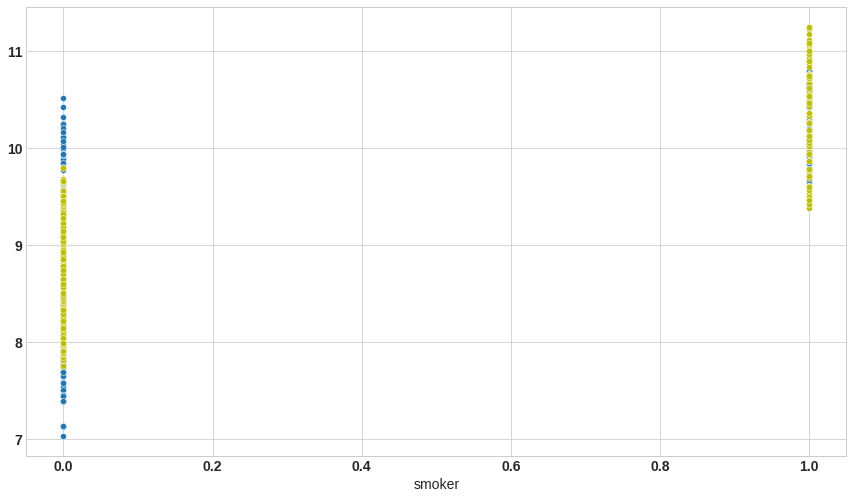

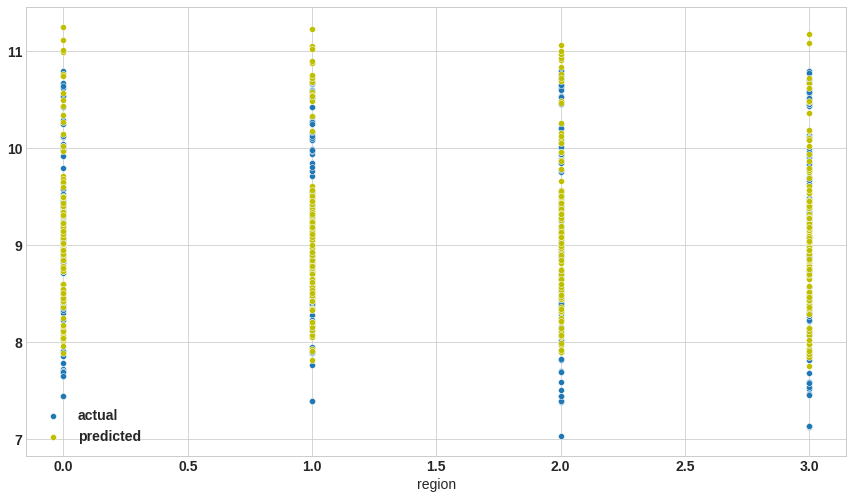

In [213]:
# for model from scratch
i=0
for i in range (0,6):
 fig, ax = plt.subplots(figsize=(14.7, 8.27))
 sns.scatterplot(x= X_test[features[i]], y=Y_test_ar)
 sns.scatterplot(x= X_test[features[i]], y=y_pred_sk, color='y')
 plt.xlabel = features[i]
plt.legend(['actual','predicted'])